In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import statistics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
DF = pd.read_csv("/content/drive/MyDrive/TSLA.csv")

In [8]:
DF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-06,39.599998,41.549999,39.500000,40.619999,40.619999,62279000
1,2015-04-07,40.501999,41.012001,40.228001,40.650002,40.650002,21739500
2,2015-04-08,41.639999,42.180000,41.174000,41.534000,41.534000,31515500
3,2015-04-09,41.686001,42.074001,41.223999,42.018002,42.018002,19001000
4,2015-04-10,41.970001,42.330002,41.799999,42.180000,42.180000,20338500
...,...,...,...,...,...,...,...
1505,2021-03-26,641.869995,643.820007,599.890015,618.710022,618.710022,33778400
1506,2021-03-29,615.640015,616.479980,596.020020,611.289978,611.289978,28637000
1507,2021-03-30,601.750000,637.659973,591.010010,635.619995,635.619995,39432400
1508,2021-03-31,646.619995,672.000000,641.109985,667.929993,667.929993,33337300


In [9]:
DF.set_index('Date', inplace = True)

In [10]:
DF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-06,39.599998,41.549999,39.500000,40.619999,40.619999,62279000
2015-04-07,40.501999,41.012001,40.228001,40.650002,40.650002,21739500
2015-04-08,41.639999,42.180000,41.174000,41.534000,41.534000,31515500
2015-04-09,41.686001,42.074001,41.223999,42.018002,42.018002,19001000
2015-04-10,41.970001,42.330002,41.799999,42.180000,42.180000,20338500
...,...,...,...,...,...,...
2021-03-26,641.869995,643.820007,599.890015,618.710022,618.710022,33778400
2021-03-29,615.640015,616.479980,596.020020,611.289978,611.289978,28637000
2021-03-30,601.750000,637.659973,591.010010,635.619995,635.619995,39432400


In [11]:
data = DF.filter(['Date','Close'])

In [12]:
data

,Close
Date,
2015-04-06,40.619999
2015-04-07,40.650002
2015-04-08,41.534000
2015-04-09,42.018002
2015-04-10,42.180000
...,...
2021-03-26,618.710022
2021-03-29,611.289978
2021-03-30,635.619995


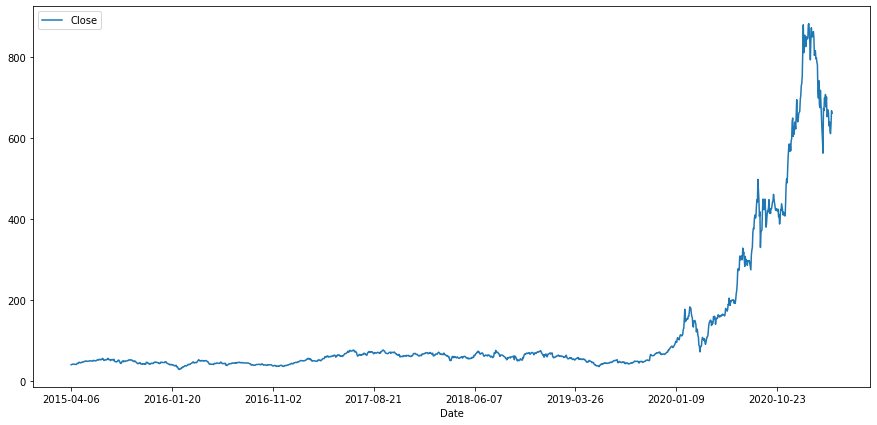

In [13]:
data.plot(figsize=(15,7))

In [11]:
X = data.values

In [12]:
train = X[0:1359]
test = X[1359:]
predictions = []

In [13]:
test.size

151

In [14]:
model_arima = ARIMA(train,order=(6, 2, 9))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

7403.222067421333


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
predictions = model_arima_fit.forecast(steps=151)[0]
predictions

array([406.02033025, 407.892212  , 414.23275308, 418.00826431,
       416.61836054, 418.18080876, 421.51910411, 425.31807183,
       431.28521467, 432.90811164, 431.88391662, 434.43858864,
       438.04551437, 442.96981212, 447.58848481, 447.64987333,
       447.70589803, 450.83579256, 455.21528008, 460.35049801,
       463.15415588, 462.74773075, 463.79699196, 467.70092766,
       472.7022412 , 477.10325056, 478.45109389, 478.14958523,
       480.32068013, 485.02320101, 490.06902257, 493.3215238 ,
       493.65174708, 493.99225615, 497.34606735, 502.5628504 ,
       507.12153824, 509.07941495, 508.99806348, 510.38439936,
       514.78195782, 520.10802068, 523.71526225, 524.57138805,
       524.71230728, 527.33191425, 532.49163928, 537.42373172,
       539.849136  , 540.04772668, 540.93729221, 544.78238277,
       550.2620302 , 554.34851744, 555.64637978, 555.7463462 ,
       557.74984708, 562.59183874, 567.87096475, 570.83168072,
       571.30407129, 571.8728499 , 575.12894936, 580.55

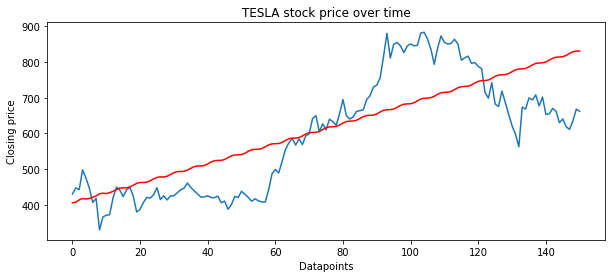

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(test)
plt.plot(predictions,color='red')
plt.title("TESLA stock price over time")
plt.xlabel("Datapoints")
plt.ylabel("Closing price")
plt.show()

In [18]:
mean_squared_error(test,predictions)

10657.868843206765

In [ ]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 14577.133540746017
(0, 0, 1) 12807.51422313956
(0, 0, 3) 10649.84429134167
(0, 0, 4) 9950.751729700016
(0, 0, 8) 8668.911866296676
(0, 1, 0) 7566.150674688863
(0, 1, 1) 7567.100361765308
(0, 1, 2) 7566.979412373721
(0, 1, 3) 7505.334225030978
(0, 1, 4) 7497.010247402688
(0, 1, 5) 7497.271949992484
(0, 1, 6) 7485.894444664584
(0, 1, 7) 7487.439195369696
(0, 1, 8) 7489.39136539167
(0, 1, 9) 7479.728576157387
(0, 2, 0) 8462.382217957973
(0, 2, 1) 7541.511491021671
(1, 0, 0) 7598.270956984109
(1, 1, 0) 7567.021091455367
(1, 1, 1) 7552.024885745638
(1, 1, 2) 7551.57800120484
(1, 1, 3) 7497.997581227533
(1, 1, 4) 7498.468911126309
(1, 1, 5) 7494.035526861263
(1, 1, 6) 7485.944300227042
(1, 1, 7) 7488.890375593235
(1, 1, 8) 7490.51124035222
(1, 2, 0) 8059.541235827391
(1, 2, 1) 7543.4721295222635
(1, 2, 2) 7530.439562157488
(1, 2, 3) 7525.198868426196
(1, 2, 4) 7485.860546262422
(1, 2, 5) 7484.054357811775
(1, 2, 6) 7480.187353840394
(1, 2, 7) 7474.8757025801515
(2, 0, 0) 7588.00278

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(test,predictions)

0.5906171406807506